In [1]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1eTDugsYaWy9B8LxUsRPzPjlTd0OlYQiz


Downloading...
From (original): https://drive.google.com/uc?id=1eTDugsYaWy9B8LxUsRPzPjlTd0OlYQiz
From (redirected): https://drive.google.com/uc?id=1eTDugsYaWy9B8LxUsRPzPjlTd0OlYQiz&confirm=t&uuid=be91c79a-2ae5-4436-ad4e-ff8dde3d3906
To: /kaggle/working/train_big.tar.gz
100%|██████████████████████████████████████| 2.63G/2.63G [00:36<00:00, 71.2MB/s]


In [2]:
!tar -xvzf /kaggle/working/train_big.tar.gz


train/X_trainp_pg_vg.npy
train/y_trainp_pg_vg.npy
train/


In [3]:
import os

# Path to the file
file_path = '/kaggle/working/train_big.tar.gz'

# Check if file exists and remove it
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been removed.")
else:
    print(f"{file_path} does not exist.")


/kaggle/working/train_big.tar.gz has been removed.


In [4]:
import numpy as np

# Load the datasets
X_train = np.load('/kaggle/working/train/X_trainp_pg_vg.npy')  # Images
y_train = np.load('/kaggle/working/train/y_trainp_pg_vg.npy')  # Labels

print(X_train.shape)
print(y_train.shape)


(318706, 128, 48)
(318706, 32)


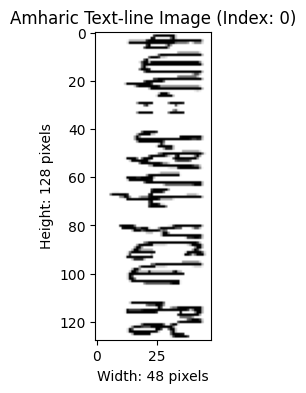

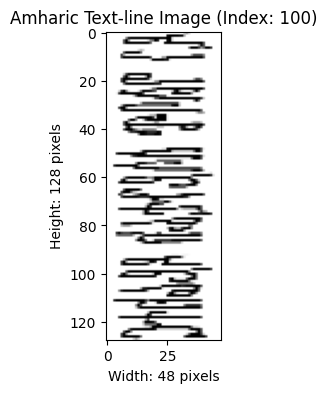

In [5]:
import matplotlib.pyplot as plt

def display_amharic_image(image_data, index=0, figsize=(12, 4)):
    """
    Display an Amharic text-line image from the dataset.
    
    Args:
        image_data: numpy array of shape (n_samples, height, width)
        index: index of the image to display
        figsize: tuple specifying figure size
    """
    # Get the specified image
    img = image_data[index]
    
    # Create figure and axis
    plt.figure(figsize=figsize)
    
    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('on')
    plt.title(f'Amharic Text-line Image (Index: {index})')
    
    # Add dimension information
    plt.xlabel(f'Width: {img.shape[1]} pixels')
    plt.ylabel(f'Height: {img.shape[0]} pixels')
    
    plt.show()

# Display the first image from the training set
display_amharic_image(X_train)

# You can display other images by specifying different indices
# For example, to see the 100th image:
display_amharic_image(X_train, index=100)

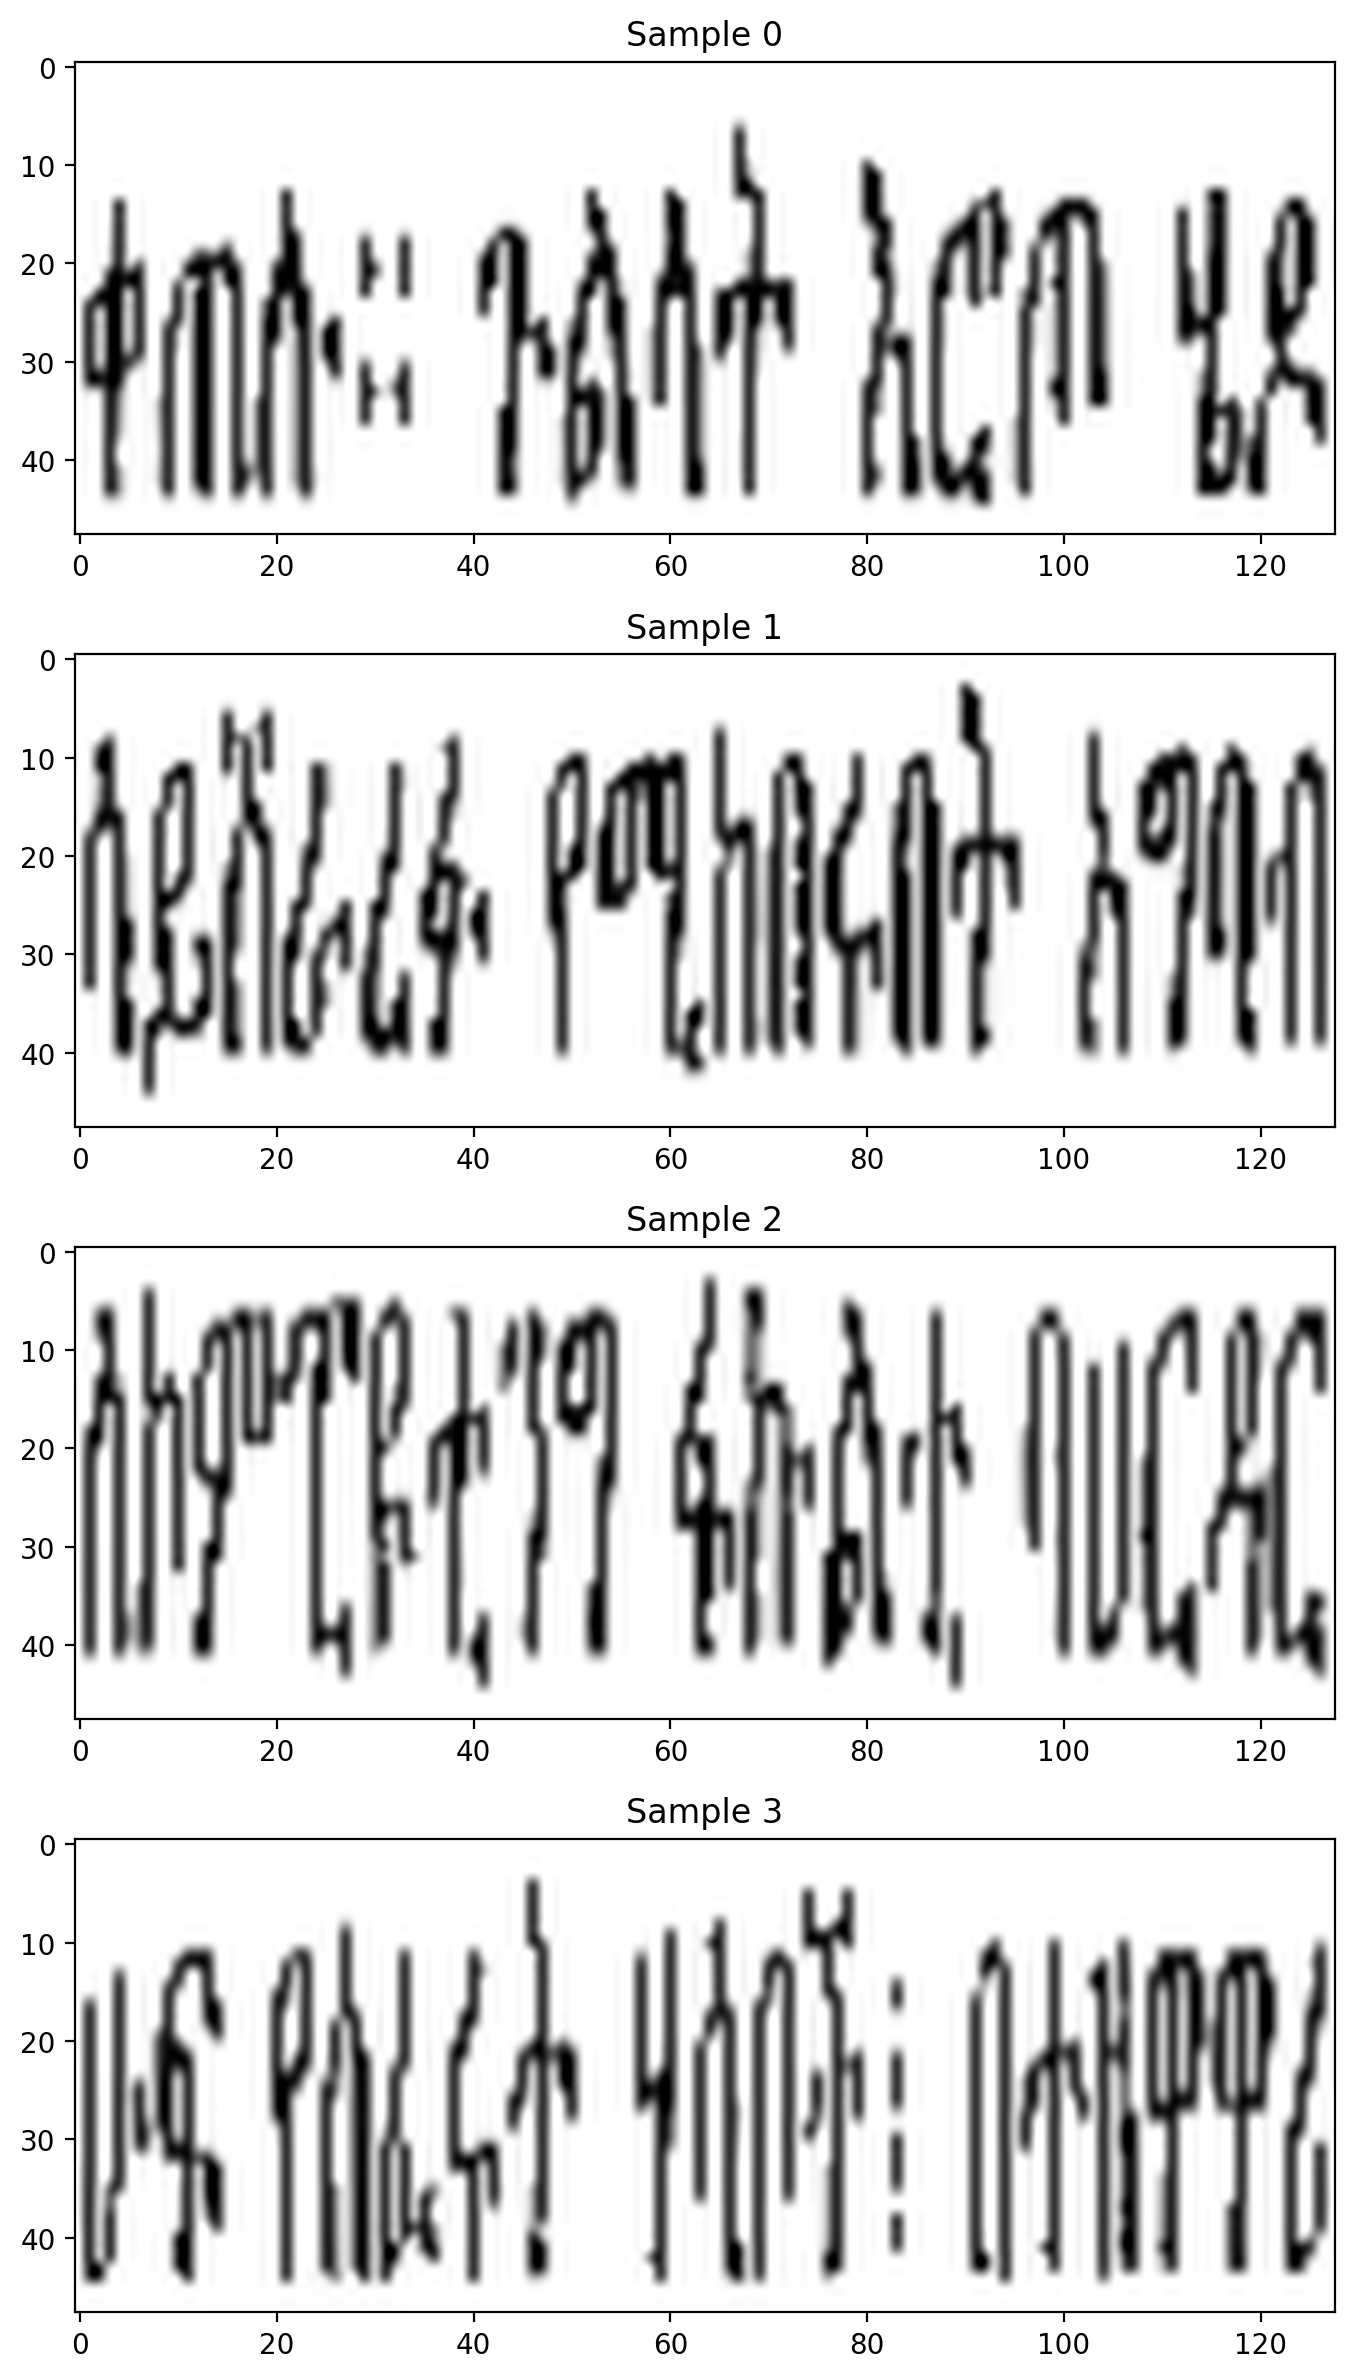

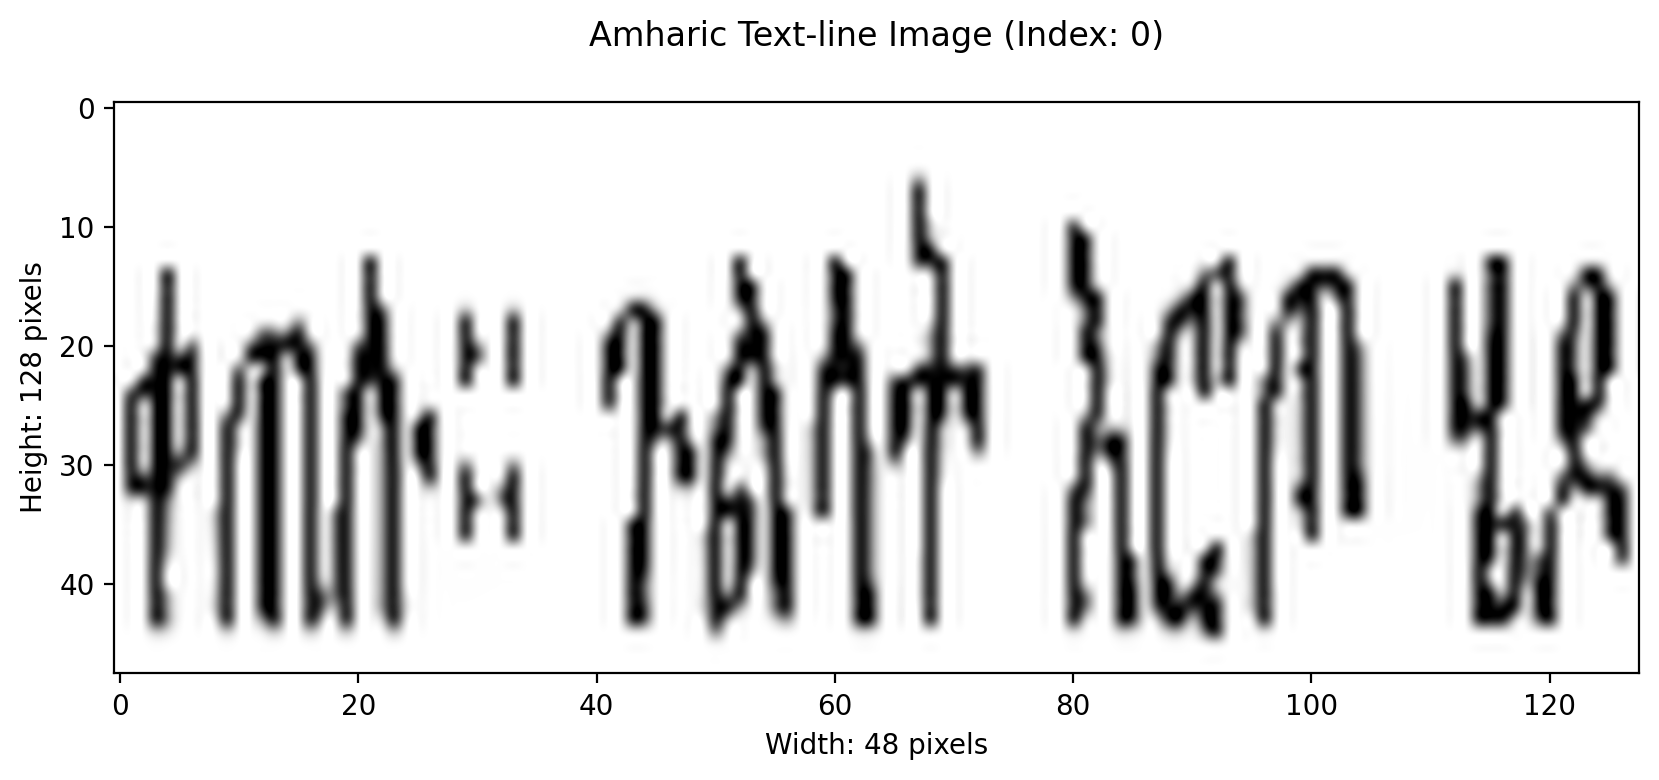

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, filters

def display_amharic_image_enhanced(image_data, index=0, figsize=(15, 4)):
    """
    Display an Amharic text-line image with enhanced quality, rotated 90 degrees to the right.
    
    Args:
        image_data: numpy array of shape (n_samples, height, width)
        index: index of the image to display
        figsize: tuple specifying figure size
    """
    # Get the specified image
    img = image_data[index]
    
    # Flip the image vertically
    img = np.flipud(img)
    
    # Normalize the image to [0, 1]
    img_normalized = img / img.max()
    
    # Enhance image contrast with Adaptive Histogram Equalization
    img_equalized = exposure.equalize_adapthist(img_normalized, clip_limit=0.03)
    
    # Apply Gaussian filter to reduce noise and improve clarity
    img_filtered = filters.gaussian(img_equalized, sigma=0.5)
    
    # Rotate the image 90 degrees to the right
    img_filtered_rotated = np.rot90(img_filtered, k=-1)
    
    # Create figure and axis with higher DPI for better quality
    plt.figure(figsize=figsize, dpi=200)
    
    # Display the enhanced and rotated image with high-quality interpolation
    plt.imshow(img_filtered_rotated, cmap='gray', interpolation='lanczos')
    plt.axis('on')
    plt.title(f'Amharic Text-line Image (Index: {index})', pad=20)
    
    # Add dimension information
    plt.xlabel(f'Width: {img.shape[1]} pixels')
    plt.ylabel(f'Height: {img.shape[0]} pixels')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Display multiple images with the enhanced visualization
fig = plt.figure(figsize=(15, 12), dpi=200)

# Display 4 sample images
for i, idx in enumerate([0, 1, 2, 3]):
    plt.subplot(4, 1, i+1)
    
    # Get and enhance image
    img = X_train[idx]
    img = np.flipud(img)
    
    # Normalize the image to [0, 1]
    img_normalized = img / img.max()
    
    # Enhance image contrast with Adaptive Histogram Equalization
    img_equalized = exposure.equalize_adapthist(img_normalized, clip_limit=0.03)
    
    # Apply Gaussian filter to reduce noise and improve clarity
    img_filtered = filters.gaussian(img_equalized, sigma=0.5)
    
    # Rotate the image 90 degrees to the right
    img_filtered_rotated = np.rot90(img_filtered, k=-1)
    
    plt.imshow(img_filtered_rotated, cmap='gray', interpolation='lanczos')
    plt.title(f'Sample {idx}')
    plt.axis('on')

plt.tight_layout()
plt.show()

# Display a single enhanced and rotated image
display_amharic_image_enhanced(X_train)


In [ ]:
import os
import numpy as np
from skimage import exposure, filters
from skimage.io import imsave
from skimage.util import img_as_ubyte

# Directory for saving X images
X_output_dir = '/kaggle/working/amharic_images_X'
os.makedirs(X_output_dir, exist_ok=True)

def save_amharic_image(image_data, index, output_dir):
    """
    Save an enhanced and rotated Amharic text-line image as a file.
    
    Args:
        image_data: numpy array of shape (height, width).
        index: Index of the image to process.
        output_dir: Directory to save the images.
    """
    # Flip, normalize, and enhance image contrast
    img = np.flipud(image_data)
    img_normalized = img / img.max()
    img_equalized = exposure.equalize_adapthist(img_normalized, clip_limit=0.03)
    img_filtered = filters.gaussian(img_equalized, sigma=0.5)
    img_rotated = np.rot90(img_filtered, k=-1)

    # Convert image to 8-bit format
    img_ubyte = img_as_ubyte(img_rotated)

    # Save the image
    output_path = os.path.join(output_dir, f'image_{index}.png')
    imsave(output_path, img_ubyte, cmap='gray')

# Step 1: Process X_train
X_train = np.load('/kaggle/working/train/X_trainp_pg_vg.npy')  # Load images

# Save each image in X_train
for idx in range(len(X_train)):
    save_amharic_image(X_train[idx], idx, X_output_dir)

# Free memory and delete the original X_train file
del X_train
os.remove('/kaggle/working/train/X_trainp_pg_vg.npy')  # Delete the original npy file

print(f"X_train conversion complete. Images saved to '{X_output_dir}' and original file deleted.")


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import Sequence

# Load label data
y_train = np.load('/kaggle/working/train/y_trainp_pg_vg.npy')

# Flatten the labels for encoding
# Convert to a list of strings, if required
y_train_flat = [' '.join(map(str, labels)) for labels in y_train]  # join sequences into single strings
label_encoder = LabelEncoder()
y_train_encoded_flat = label_encoder.fit_transform(y_train_flat)  # Encode the flat labels

# Define a data generator class for loading data in batches
class DataGenerator(Sequence):
    def __init__(self, x_path, y_encoded, batch_size=32):
        self.x_path = x_path
        self.y_encoded = y_encoded
        self.batch_size = batch_size
        self.indices = np.arange(len(y_encoded))

    def __len__(self):
        return int(np.ceil(len(self.y_encoded) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        
        # Ensure batch indices are valid
        batch_indices = np.clip(batch_indices, 0, len(self.y_encoded) - 1)

        # Load and reshape X batch
        X_batch = np.load(self.x_path, mmap_mode='r')[batch_indices]
        X_batch = X_batch[..., np.newaxis]  # Add channel dimension for grayscale
        
        # Load y batch
        y_batch = self.y_encoded[batch_indices]
        
        return X_batch, y_batch

# Initialize data generator
x_path = '/kaggle/working/train/X_trainp_pg_vg.npy'
train_generator = DataGenerator(x_path, y_train_encoded_flat, batch_size=32)

# Define a simple CNN for OCR
model = models.Sequential([
    layers.Input(shape=(128, 48, 1)),  # Shape for grayscale images
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer size matches number of classes
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with generator
model.fit(train_generator, epochs=10)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729872111.859004     199 service.cc:145] XLA service 0x5ce0583e98d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729872111.859051     199 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  16/9960 ━━━━━━━━━━━━━━━━━━━━ 1:46 11ms/step - accuracy: 0.0000e+00 - loss: 10.4373

I0000 00:00:1729872114.619529     199 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9960/9960 ━━━━━━━━━━━━━━━━━━━━ 111s 11ms/step - accuracy: 0.4101 - loss: 4.6631
Epoch 2/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 102s 10ms/step - accuracy: 0.8482 - loss: 1.4528
Epoch 3/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 102s 10ms/step - accuracy: 0.8607 - loss: 1.3904
Epoch 4/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 104s 10ms/step - accuracy: 0.8722 - loss: 1.3080
Epoch 5/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 100s 10ms/step - accuracy: 0.8761 - loss: 1.2814
Epoch 6/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 102s 10ms/step - accuracy: 0.8757 - loss: 1.2881
Epoch 7/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 103s 10ms/step - accuracy: 0.8798 - loss: 1.2388
Epoch 8/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 105s 11ms/step - accuracy: 0.8815 - loss: 1.2188
Epoch 9/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 105s 11ms/step - accuracy: 0.8812 - loss: 1.2081
Epoch 10/10
9960/9960 ━━━━━━━━━━━━━━━━━━━━ 105s 10ms/step - accuracy: 0.8863 - loss: 1.1455


In [6]:
model.save('/kaggle/working/amharic_ocr_model.h5')

In [7]:
import cv2
import numpy as np

# Create a blank white image
img = np.ones((128, 48, 3), dtype=np.uint8) * 255

# Add Amharic text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
text = "እርስዎ"  # Sample Amharic text, you can replace this with any text
cv2.putText(img, text, (5, 100), font, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

# Save the test image
cv2.imwrite('/kaggle/working/test_image.png', img)


True

In [10]:
import numpy as np
import cv2  # OpenCV for image processing
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('/kaggle/working/amharic_ocr_model.h5')

# Load label data used during training
y_train = np.load('/kaggle/working/train/y_trainp_pg_vg.npy')

# Create a flat representation of y_train for the label encoder
y_train_flat = [' '.join(map(str, labels)) for labels in y_train]  # join sequences into single strings
label_encoder = LabelEncoder()
label_encoder.fit(y_train_flat)  # Fit the encoder to the training labels

def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    image = cv2.resize(image, (48, 128))  # Resize to the input shape expected by the model
    image = image.astype('float32') / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class
    predicted_class_indices = np.argmax(predictions, axis=-1)
    
    # Decode the predicted class indices to characters
    predicted_labels = label_encoder.inverse_transform(predicted_class_indices)
    
    return ''.join(predicted_labels)  # Join the predicted characters into a string

# Test with an example input image
test_image_path = '/kaggle/input/amharic-text-dataset/Screenshot 2024-08-07 123233.png'  # Update with your test image path
predicted_text = predict_image(test_image_path)

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Text: 141 24 189 1 83 55 167 59 1 138 122 191 97 209 21 239 160 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [13]:
# Load the trained model
model = load_model('/kaggle/working/amharic_ocr_model.h5')

# Load label data used during training
y_train = np.load('/kaggle/working/train/y_trainp_pg_vg.npy')

# Create a flat representation of y_train for the label encoder
y_train_flat = [' '.join(map(str, labels)) for labels in y_train]  # Join sequences into single strings
label_encoder = LabelEncoder()
label_encoder.fit(y_train_flat)  # Fit the encoder to the training labels

# Mapping indices back to actual labels
index_to_char = {i: char for i, char in enumerate(label_encoder.classes_)}


In [16]:
def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class
    predicted_class_indices = np.argmax(predictions, axis=-1)
    
    # Convert predicted class indices to characters using index_to_char mapping
    predicted_text = ''.join(index_to_char[i] for i in predicted_class_indices if i in index_to_char)

    return predicted_text  # Return the predicted characters as a string

# Test with an example input image
test_image_path = '/kaggle/input/amharic-text-dataset/Screenshot 2024-08-07 123233.png'  # Update with your test image path
predicted_text = predict_image(test_image_path)

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Text: 141 24 189 1 83 55 167 59 1 138 122 191 97 209 21 239 160 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [15]:
def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class
    predicted_class_indices = np.argmax(predictions, axis=-1)
    
    # Convert predicted class indices to characters using index_to_char mapping
    predicted_text = ''.join(index_to_char[i] for i in predicted_class_indices if i > 0)  # Filter out '0' if it's a placeholder
    
    return predicted_text  # Return the predicted characters as a string


In [18]:
def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class indices
    predicted_class_indices = np.argmax(predictions, axis=-1)

    # Print debugging information
    print("Raw predictions:", predictions)
    print("Predicted class indices:", predicted_class_indices)

    # Check if predicted_class_indices is in the expected shape
    if predicted_class_indices.ndim > 1:
        predicted_class_indices = predicted_class_indices[0]  # Get the first batch if multiple

    # Map indices to characters, filtering out any invalid or padding characters (0)
    predicted_text = ''.join(index_to_char[i] for i in predicted_class_indices if i > 0)

    return predicted_text  # Return the predicted characters as a string

# Test with an example input image
test_image_path = '/kaggle/input/amharic-text-dataset/Screenshot 2024-08-07 123233.png'  # Update with your test image path
predicted_text = predict_image(test_image_path)

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Raw predictions: [[5.4468292e-05 1.5844043e-05 2.4716485e-06 ... 9.0220476e-07
  3.5746789e-06 3.9191032e-06]]
Predicted class indices: [8586]
Predicted Text: 141 24 189 1 83 55 167 59 1 138 122 191 97 209 21 239 160 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [20]:
import numpy as np
import cv2  # OpenCV for image processing
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('/kaggle/working/amharic_ocr_model.h5')

# Load label data used during training
y_train = np.load('/kaggle/working/train/y_trainp_pg_vg.npy')

# Create a flat representation of y_train for the label encoder
y_train_flat = [' '.join(map(str, labels)) for labels in y_train]  # join sequences into single strings
label_encoder = LabelEncoder()
label_encoder.fit(y_train_flat)  # Fit the encoder to the training labels

# Create a mapping from indices to characters
index_to_char = {i: char for i, char in enumerate(label_encoder.classes_)}

def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    image = cv2.resize(image, (48, 128))  # Resize to the input shape expected by the model
    image = image.astype('float32') / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class indices
    predicted_class_indices = np.argmax(predictions, axis=-1)

    # Debugging output
    print("Raw predictions:", predictions)
    print("Predicted class indices:", predicted_class_indices)

    # Handle multi-dimensional output (if applicable)
    if predicted_class_indices.ndim > 1:
        predicted_class_indices = predicted_class_indices[0]  

    # Map indices to characters, filtering out any invalid or padding characters (0)
    predicted_text = ''.join(index_to_char[i] for i in predicted_class_indices if i in index_to_char)  # Check if index is in the map

    return predicted_text  # Return the predicted characters as a string

# Test with an example input image
test_image_path = '/kaggle/input/amharic-text-dataset/Screenshot 2024-08-07 123233.png'  # Update with your test image path
predicted_text = predict_image(test_image_path)

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Raw predictions: [[5.4468292e-05 1.5844043e-05 2.4716485e-06 ... 9.0220476e-07
  3.5746789e-06 3.9191032e-06]]
Predicted class indices: [8586]
Predicted Text: 141 24 189 1 83 55 167 59 1 138 122 191 97 209 21 239 160 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [22]:
import numpy as np
import cv2  # OpenCV for image processing
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = load_model('/kaggle/working/amharic_ocr_model.h5')

# Load label data used during training
y_train = np.load('/kaggle/working/train/y_trainp_pg_vg.npy')

# Create a flat representation of y_train for the label encoder
y_train_flat = [' '.join(map(str, labels)) for labels in y_train]  # join sequences into single strings
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_flat)  # Fit the encoder to the training labels

# Create a mapping from indices to characters
index_to_char = {i: char for i, char in enumerate(label_encoder.classes_)}

def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    image = cv2.resize(image, (48, 128))  # Resize to the input shape expected by the model
    image = image.astype('float32') / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Debugging output
    print("Raw predictions:", predictions)
    
    # Get the predicted class indices
    predicted_class_indices = np.argmax(predictions, axis=-1)

    print("Predicted class indices:", predicted_class_indices)

    # Handle multi-dimensional output (if applicable)
    if predicted_class_indices.ndim > 1:
        predicted_class_indices = predicted_class_indices[0]

    # Map indices to characters, filtering out any invalid or padding characters (0)
    predicted_text = ''.join(index_to_char[i] for i in predicted_class_indices if i in index_to_char)
    
    return predicted_text  # Return the predicted characters as a string

# Test with an example input image
test_image_path = '/kaggle/input/amharic-text-dataset/Screenshot 2024-10-25 192308.png'  # Update with your test image path
predicted_text = predict_image(test_image_path)

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Raw predictions: [[2.4318824e-05 1.0147189e-05 1.9837573e-06 ... 7.1649595e-07
  2.3421769e-06 2.6123839e-06]]
Predicted class indices: [8588]
Predicted Text: 141 24 189 1 83 55 167 59 1 138 122 191 97 209 21 246 160 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [11]:
# After fitting the label encoder
print("Classes in Label Encoder:", label_encoder.classes_)
print("Number of Classes:", len(label_encoder.classes_))


Classes in Label Encoder: ['1 102 122 71 1 138 122 191 80 184 110 1 214 122 1 196 122 209 102 1 0 0 0 0 0 0 0 0 0 0 0 0'
 '1 102 141 69 110 122 122 1 133 120 61 55 258 40 269 1 141 155 21 22 1 0 0 0 0 0 0 0 0 0 0 0'
 '1 102 167 85 98 1 58 223 100 158 21 110 268 268 1 155 122 197 106 1 0 0 0 0 0 0 0 0 0 0 0 0'
 ...
 '99 259 175 161 110 1 83 196 122 209 102 1 142 40 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0'
 '99 38 99 40 1 138 122 150 122 1 63 122 102 1 138 122 191 209 86 1 0 0 0 0 0 0 0 0 0 0 0 0'
 '99 98 133 122 1 189 209 120 128 26 269 1 184 193 41 146 53 99 146 1 0 0 0 0 0 0 0 0 0 0 0 0']
Number of Classes: 34662


In [12]:
def predict_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make prediction
    predictions = model.predict(preprocessed_image)
    
    # Get the predicted class
    predicted_class_indices = np.argmax(predictions, axis=-1)
    
    # Check if predicted indices are within the valid range
    valid_indices = np.clip(predicted_class_indices, 0, len(label_encoder.classes_) - 1)
    
    # Decode the predicted class indices to characters
    predicted_labels = label_encoder.inverse_transform(valid_indices)
    
    return ''.join(predicted_labels)  # Join the predicted characters into a string

# Test with an example input image
test_image_path = '/kaggle/input/amharic-text-dataset/Screenshot 2024-08-07 123233.png'  # Update with your test image path
predicted_text = predict_image(test_image_path)

print(f"Predicted Text: {predicted_text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Text: 141 24 189 1 83 55 167 59 1 138 122 191 97 209 21 239 160 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
